# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('3.2.1.1 appl_1980_2014.csv')

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date',inplace=True)

In [7]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [12]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [13]:
apple.sort_index(inplace = True)

In [14]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [32]:
apple.last('D')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.8,93.92,95.35,65130000,95.35


In [33]:
apple.last('M')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


In [34]:
apple.last('Y')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,555.68,557.03,552.02,553.13,58671200,78.11
2014-01-03,552.86,553.70,540.43,540.98,98116900,76.40
2014-01-06,537.45,546.80,533.60,543.93,103152700,76.81
2014-01-07,544.32,545.96,537.92,540.04,79302300,76.26
2014-01-08,538.81,545.56,538.69,543.46,64632400,76.75
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [36]:
apple.resample("D").count()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,1,1,1,1,1,1
1980-12-13,0,0,0,0,0,0
1980-12-14,0,0,0,0,0,0
1980-12-15,1,1,1,1,1,1
1980-12-16,1,1,1,1,1,1
...,...,...,...,...,...,...
2014-07-04,0,0,0,0,0,0
2014-07-05,0,0,0,0,0,0
2014-07-06,0,0,0,0,0,0


In [37]:
apple.resample("2D").count()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,1,1,1,1,1,1
1980-12-14,1,1,1,1,1,1
1980-12-16,2,2,2,2,2,2
1980-12-18,2,2,2,2,2,2
1980-12-20,0,0,0,0,0,0
...,...,...,...,...,...,...
2014-06-29,1,1,1,1,1,1
2014-07-01,2,2,2,2,2,2
2014-07-03,1,1,1,1,1,1


In [35]:
apple.resample("M").count()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,13,13,13,13,13,13
1981-01-31,21,21,21,21,21,21
1981-02-28,19,19,19,19,19,19
1981-03-31,22,22,22,22,22,22
1981-04-30,21,21,21,21,21,21
...,...,...,...,...,...,...
2014-03-31,21,21,21,21,21,21
2014-04-30,21,21,21,21,21,21
2014-05-31,21,21,21,21,21,21


In [39]:
apple.resample("Y").max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,36.00,36.13,36.00,36.00,117258400,0.56
1981-12-31,34.50,34.75,34.50,34.50,57825600,0.54
1982-12-31,33.87,34.88,33.00,33.87,89269600,0.53
1983-12-31,62.75,63.25,61.37,62.75,305379200,0.98
1984-12-31,33.25,34.38,32.50,33.25,156699200,0.52
1985-12-31,30.63,31.12,30.63,30.63,183495200,0.48
1986-12-31,43.63,43.87,42.62,43.75,226032800,0.68
1987-12-31,80.50,82.25,79.75,80.25,194320000,1.85
1988-12-31,47.13,47.75,46.50,47.25,170240000,1.49


In [38]:
apple.resample("M").max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,36.00,36.13,36.00,36.00,117258400,0.56
1981-01-31,34.50,34.75,34.50,34.50,13921600,0.54
1981-02-28,28.75,28.87,28.75,28.75,6966400,0.45
1981-03-31,26.75,27.00,26.75,26.75,57825600,0.42
1981-04-30,29.25,29.37,29.25,29.25,14504000,0.46
...,...,...,...,...,...,...
2014-03-31,546.52,549.00,539.59,544.99,93511600,77.42
2014-04-30,593.74,599.43,589.80,594.09,189977900,84.40
2014-05-31,637.98,644.17,628.90,635.38,141005200,90.77


In [41]:
apple.resample("M")['Open'].max()

Date
1980-12-31     36.00
1981-01-31     34.50
1981-02-28     28.75
1981-03-31     26.75
1981-04-30     29.25
               ...  
2014-03-31    546.52
2014-04-30    593.74
2014-05-31    637.98
2014-06-30    649.90
2014-07-31     96.27
Freq: M, Name: Open, Length: 404, dtype: float64

In [42]:
apple.resample("BM")['Open'].max()

Date
1980-12-31     36.00
1981-01-30     34.50
1981-02-27     28.75
1981-03-31     26.75
1981-04-30     29.25
               ...  
2014-03-31    546.52
2014-04-30    593.74
2014-05-30    637.98
2014-06-30    649.90
2014-07-31     96.27
Freq: BM, Name: Open, Length: 404, dtype: float64

In [43]:
date = [str(i) for i in apple.index]
lday = []
for i in range(len(date)):
    if i==len(date)-1 or date[i][6:8] != date[i+1][6:8]:
        lday.append(date[i])

In [44]:
lday

['1980-12-31 00:00:00',
 '1981-01-30 00:00:00',
 '1981-02-27 00:00:00',
 '1981-03-31 00:00:00',
 '1981-04-30 00:00:00',
 '1981-05-29 00:00:00',
 '1981-06-30 00:00:00',
 '1981-07-31 00:00:00',
 '1981-08-31 00:00:00',
 '1981-09-30 00:00:00',
 '1981-10-30 00:00:00',
 '1981-11-30 00:00:00',
 '1981-12-31 00:00:00',
 '1982-01-29 00:00:00',
 '1982-02-26 00:00:00',
 '1982-03-31 00:00:00',
 '1982-04-30 00:00:00',
 '1982-05-28 00:00:00',
 '1982-06-30 00:00:00',
 '1982-07-30 00:00:00',
 '1982-08-31 00:00:00',
 '1982-09-30 00:00:00',
 '1982-10-29 00:00:00',
 '1982-11-30 00:00:00',
 '1982-12-31 00:00:00',
 '1983-01-31 00:00:00',
 '1983-02-28 00:00:00',
 '1983-03-31 00:00:00',
 '1983-04-29 00:00:00',
 '1983-05-31 00:00:00',
 '1983-06-30 00:00:00',
 '1983-07-29 00:00:00',
 '1983-08-31 00:00:00',
 '1983-09-30 00:00:00',
 '1983-10-31 00:00:00',
 '1983-11-30 00:00:00',
 '1983-12-30 00:00:00',
 '1984-01-31 00:00:00',
 '1984-02-29 00:00:00',
 '1984-03-30 00:00:00',
 '1984-04-30 00:00:00',
 '1984-05-31 00:

### Step 10.  What is the difference in days between the first day and the oldest

In [45]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

In [46]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [51]:
apple.resample("M").__len__()

404

In [52]:
date = [str(i) for i in apple.index]
Tmonths = 0
for i in range(len(date)):
    if i==len(date)-1 or date[i][6:8] != date[i+1][6:8]:
        Tmonths += 1

In [53]:
Tmonths

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

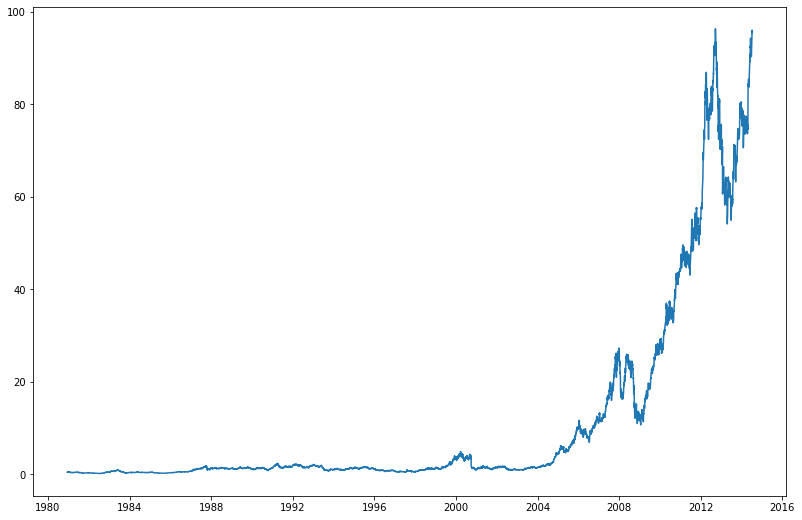

In [56]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])

<h2 style="color:blue"> BONUS: Create your own question and answer it</h2>

<AxesSubplot:xlabel='Date'>

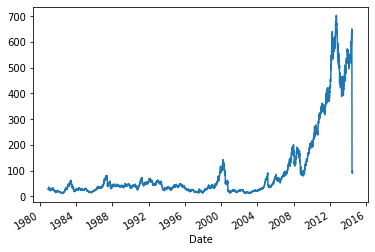

In [57]:
apple['Open'].plot()